# Vortex Blinking Simulation in Hamiltonian Chaos

### Formulation

1. **Stream Function (Ψ):** 
   In potential flow theory, the stream function is a scalar function whose contours represent the flow lines of the fluid. For a vortex, the stream function Ψ at a point (x, y) in the plane is given by:
   $$
   Ψ(x, y) = \frac{Γ}{2π} \ln\sqrt{(x - x_0)^2 + (y - y_0)^2}
   $$
   Here, $Γ$ is the circulation of the vortex, and $(x_0, y_0)$ is the position of the vortex center. The circulation $Γ$ determines the strength and the rotational direction of the vortex.

2. **Velocity Field:** 
   The velocity components (u, v) at any point (x, y) in the flow field can be derived from the stream function. They are given by the partial derivatives of Ψ:
   $$
   u(x, y) = \frac{\partial Ψ}{\partial y}, \quad v(x, y) = -\frac{\partial Ψ}{\partial x}
   $$
   Substituting the expression for Ψ and simplifying, we get:
   $$
   u(x, y) = -\frac{Γ}{2π} \frac{y - y_0}{(x - x_0)^2 + (y - y_0)^2}, \quad v(x, y) = \frac{Γ}{2π} \frac{x - x_0}{(x - x_0)^2 + (y - y_0)^2}
   $$
   These expressions describe the velocity field around the vortex.

3. **Regularization with Delta (δ):**
   In numerical simulations, a small parameter δ is often added to the denominator to avoid the singularity at the vortex center:
   $$
   u(x, y) = -\frac{Γ}{2π} \frac{y - y_0}{(x - x_0)^2 + (y - y_0)^2 + δ^2}, \quad v(x, y) = \frac{Γ}{2π} \frac{x - x_0}{(x - x_0)^2 + (y - y_0)^2 + δ^2}
   $$
   This δ term helps to avoid numerical issues when the point (x, y) is very close to the vortex center (x_0, y_0).


## Parameter Overview

- **delta**: A small numerical value to avoid singularities 
- **vortex_frequency**: Controls how frequently the active vortex switches
- **orientation**: Sets the initial orientation of vortex interaction


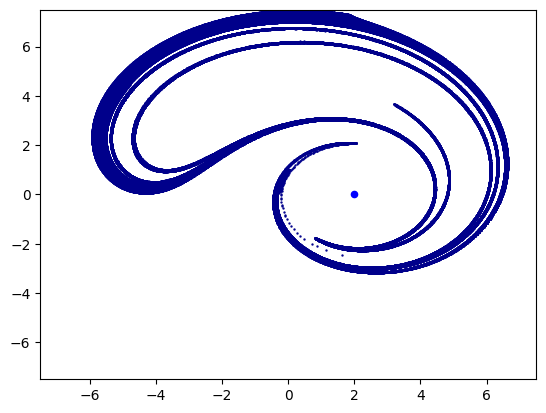

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from matplotlib.animation import FFMpegWriter

# Parameters
field_size = 2
n_points = 500
t_final = 500
n_steps = 200
dt = t_final / n_steps
v1_pos = np.array([-2, 0])
v2_pos = np.array([2, 0])
delta = 0.5
vortex_frequency = 50
orientation = -1

# Meshgrid
x1, y1 = np.linspace(-field_size, field_size, n_points), np.linspace(-field_size, field_size, n_points)
X1, Y1 = np.meshgrid(x1, y1)

# Velocity field function
def velocity_field(x, y, v_posx, v_posy, orientation, delta):
    u = (-orientation / (2 * np.pi)) * ((y - v_posy) / ((x - v_posx) ** 2 + (y - v_posy) ** 2 + delta ** 2))
    v = (orientation / (2 * np.pi)) * ((x - v_posx) / ((x - v_posx) ** 2 + (y - v_posy) ** 2 + delta ** 2))
    return u, v

# Setup plot for capturing
fig, ax = plt.subplots()
plt.xlim([-7.5, 7.5])
plt.ylim([-7.5, 7.5])

# Setup video writer
writer = FFMpegWriter(fps=20)
with writer.saving(fig, "Blinking_vortex.mp4", dpi=200):
    for t in range(n_steps):
        if t % vortex_frequency == 0:
            orientation = orientation * -1

        if orientation == 1:
            u1, v1 = velocity_field(X1, Y1, v1_pos[0], v1_pos[1], orientation, delta)
        else:
            u1, v1 = velocity_field(X1, Y1, v2_pos[0], v2_pos[1], orientation, delta)

        X1 += dt * u1
        Y1 += dt * v1

        ax.clear()
        ax.scatter(X1, Y1, color='#00008B', s=0.5)

        if orientation == 1:
            plt.scatter(v1_pos[0], v1_pos[1], color='#FF0000', s=20)    # Red vortex
        else:
            plt.scatter(v2_pos[0], v2_pos[1], color='#0000FF', s=20)    # Blue vortex

        ax.set_xlim([-7.5, 7.5])
        ax.set_ylim([-7.5, 7.5])

        writer.grab_frame()